In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosyanın tam yolu
file_path = '/content/drive/MyDrive/Superstore.xlsx'

# Excel dosyasını oku
df = pd.read_excel(file_path)

# Veri setini incele
print(df.head())       # İlk birkaç satır
print(df.info())       # Veri yapısı ve sütun bilgileri
print(df.isnull().sum())  # Eksik değer kontrolü


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
1       2  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
2       3  CA-2013-138688 2013-06-13 2013-06-17    Second Class    DV-13045   
3       4  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   
4       5  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  

In [ ]:
# 1. Gereksiz Sütunların Kaldırılması
df = df.drop(columns=['Row ID'])  # Row ID'yi kaldırıyoruz

# 2. Tarih Formatlarının Kontrol Edilmesi (Zaten doğru görünüyor ama tekrar kontrol edelim)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# 3. Duplicates Kontrolü
duplicates = df.duplicated().sum()
print(f"Yinelenen satır sayısı: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()

# 4. Kategorik Veriler - Gerekirse dönüştürme (örneğin, Segment'i sayısala çevirebiliriz)
# Ancak önce kategorik verilerin benzersiz değerlerine bakalım
print("Segment Benzersiz Değerler: ", df['Segment'].unique())

# Veri setini inceleyelim
print(df.info())
print(df.head())

Yinelenen satır sayısı: 1
Segment Benzersiz Değerler:  ['Consumer' 'Corporate' 'Home Office']
<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9993 non-null   object        
 1   Order Date     9993 non-null   datetime64[ns]
 2   Ship Date      9993 non-null   datetime64[ns]
 3   Ship Mode      9993 non-null   object        
 4   Customer ID    9993 non-null   object        
 5   Customer Name  9993 non-null   object        
 6   Segment        9993 non-null   object        
 7   Country        9993 non-null   object        
 8   City           9993 non-null   object        
 9   State          9993 non-null   object        
 10  Postal Code    9993 non-null   int64         
 11  Region         9993 non-null   object        
 12  Product ID     9993 non-null   object        
 13  Category       9993 non-null   obj

                          Order Date                      Ship Date  \
count                           9993                           9993   
mean   2013-04-30 21:06:30.153107200  2013-05-04 20:07:16.625637888   
min              2011-01-04 00:00:00            2011-01-08 00:00:00   
25%              2012-05-23 00:00:00            2012-05-27 00:00:00   
50%              2013-06-27 00:00:00            2013-06-30 00:00:00   
75%              2014-05-15 00:00:00            2014-05-19 00:00:00   
max              2014-12-31 00:00:00            2015-01-06 00:00:00   
std                              NaN                            NaN   

        Postal Code         Sales     Quantity     Discount       Profit  
count   9993.000000   9993.000000  9993.000000  9993.000000  9993.000000  
mean   55191.576403    229.852846     3.789753     0.156188    28.660971  
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000  
25%    23223.000000     17.280000     2.000000     0.000000 

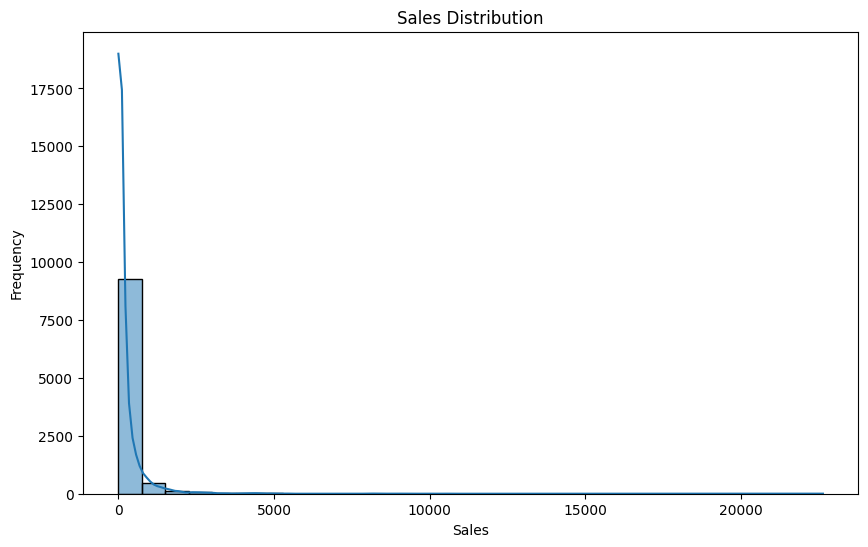

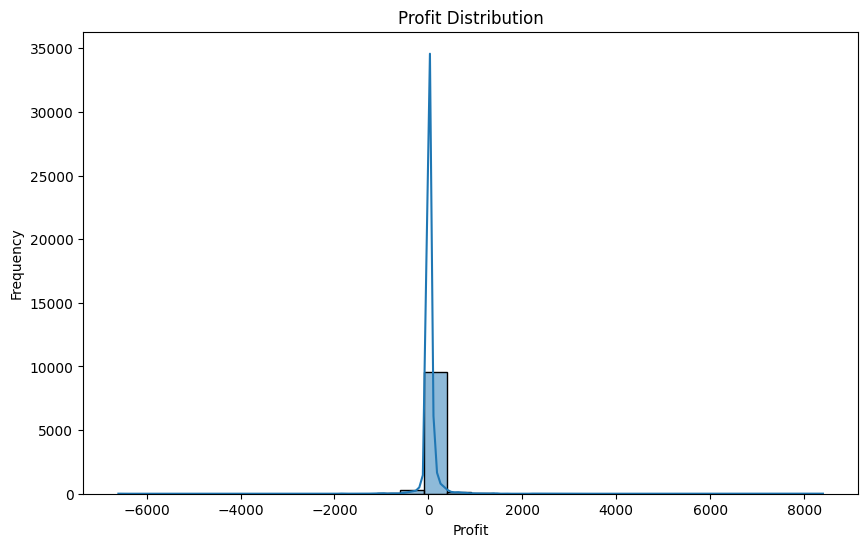

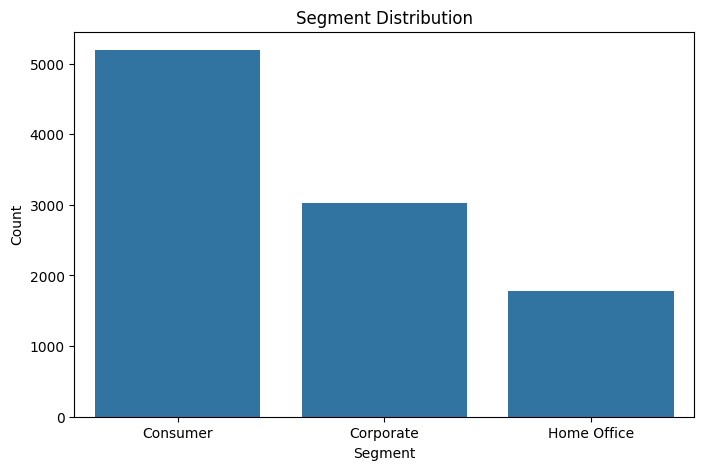

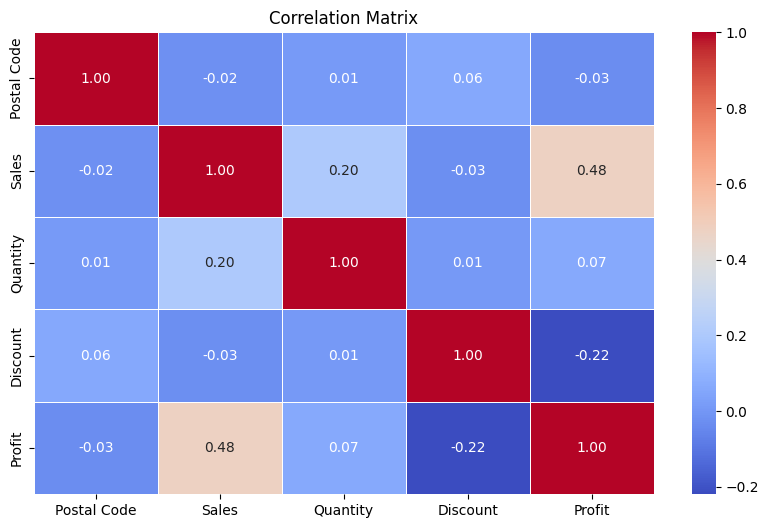

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veri Setinin İstatistiksel Özeti
print(df.describe())  # Sayısal sütunlar için istatistiksel özet

# 2. Satışların Dağılımını Görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# 3. Karın (Profit) Dağılımını Görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

# 4. Kategorik Değerlerin Dağılımı (örneğin Segment)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Segment')
plt.title('Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

# 5. Korelasyon Matrisi
# Sayısal sütunları seç
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesapla
corr = numeric_df.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



<ipython-input-4-3e7e680eff83>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


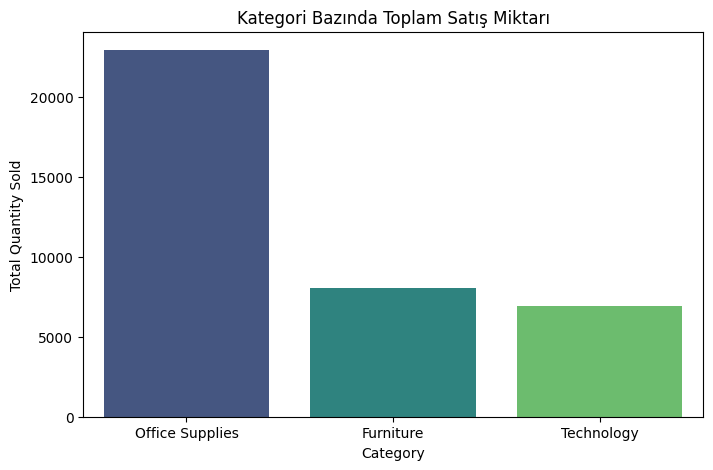

<ipython-input-4-3e7e680eff83>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette='coolwarm')


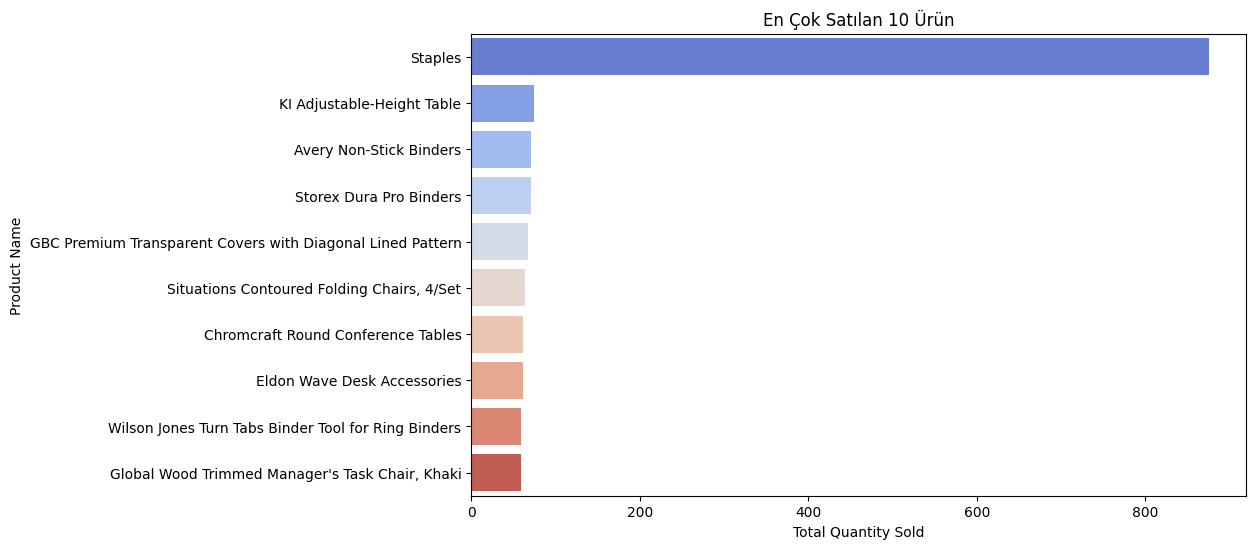

In [ ]:
# 1. Kategori Bazında Toplam Satış Miktarı (Quantity)
category_sales = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Görselleştirme: Kategori Bazında Satışlar
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Kategori Bazında Toplam Satış Miktarı')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.show()

# 2. Ürün Bazında En Çok Satılan Ürünler
product_sales = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

# Görselleştirme: En Çok Satılan 10 Ürün
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='coolwarm')
plt.title('En Çok Satılan 10 Ürün')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()


<ipython-input-5-0959efcc6391>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='Blues_d')


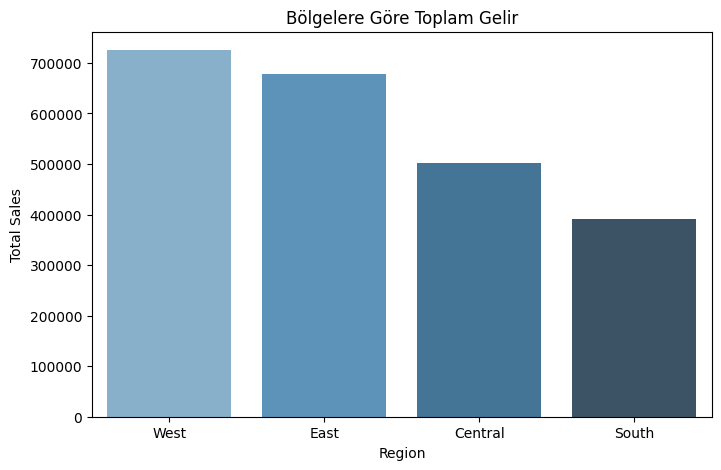

<ipython-input-5-0959efcc6391>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='Greens_d')


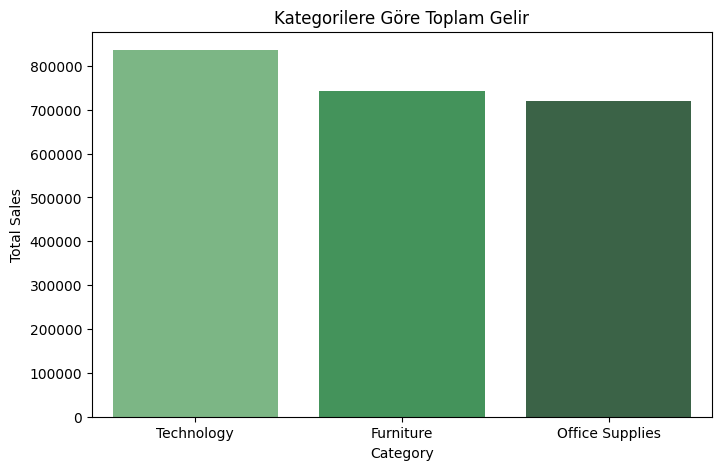

In [ ]:
# 1. Bölgelere Göre Toplam Gelir (Sales)
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Görselleştirme: Bölgelere Göre Satış Gelirleri
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='Blues_d')
plt.title('Bölgelere Göre Toplam Gelir')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# 2. Kategorilere Göre Toplam Gelir (Sales)
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Görselleştirme: Kategorilere Göre Satış Gelirleri
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='Greens_d')
plt.title('Kategorilere Göre Toplam Gelir')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


<Figure size 1000x600 with 0 Axes>

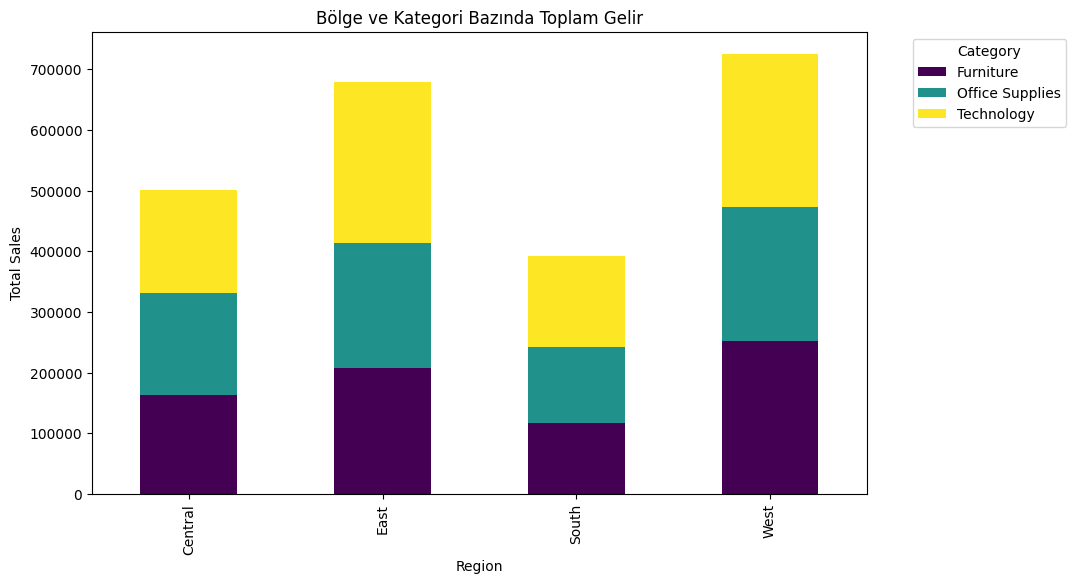

In [ ]:
# Bölge ve kategori bazında toplam gelir
region_category_sales = df.groupby(['Region', 'Category'])['Sales'].sum().unstack()

# Görselleştirme: Bölge ve Kategori Bazında Gelir
plt.figure(figsize=(10, 6))
region_category_sales.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Bölge ve Kategori Bazında Toplam Gelir')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


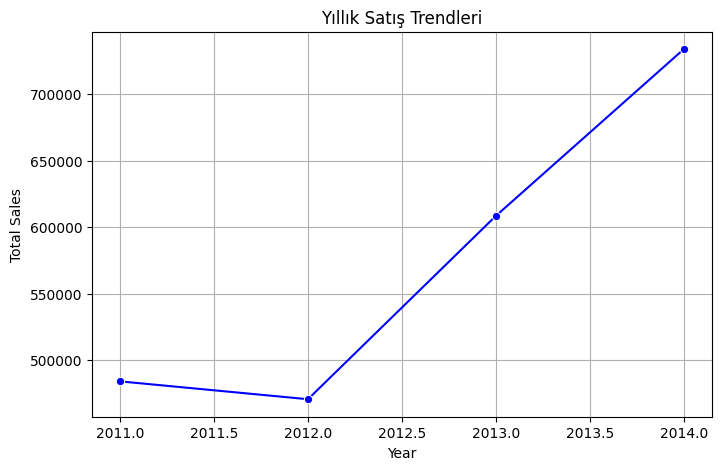

In [ ]:
# Yıl bazında toplam satış
df['Year'] = df['Order Date'].dt.year
annual_sales = df.groupby('Year')['Sales'].sum()

# Görselleştirme: Yıllık satışlar
plt.figure(figsize=(8, 5))
sns.lineplot(x=annual_sales.index, y=annual_sales.values, marker='o', color='blue')
plt.title('Yıllık Satış Trendleri')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


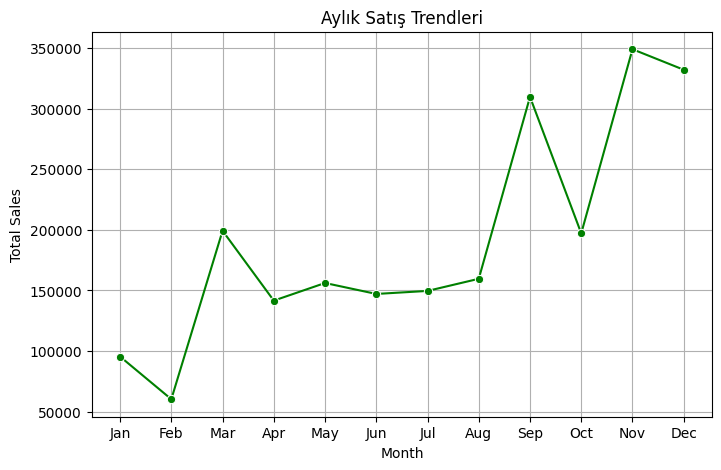

In [ ]:
# Ay bazında toplam satış
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Month')['Sales'].sum()

# Görselleştirme: Aylık satışlar
plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='green')
plt.title('Aylık Satış Trendleri')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


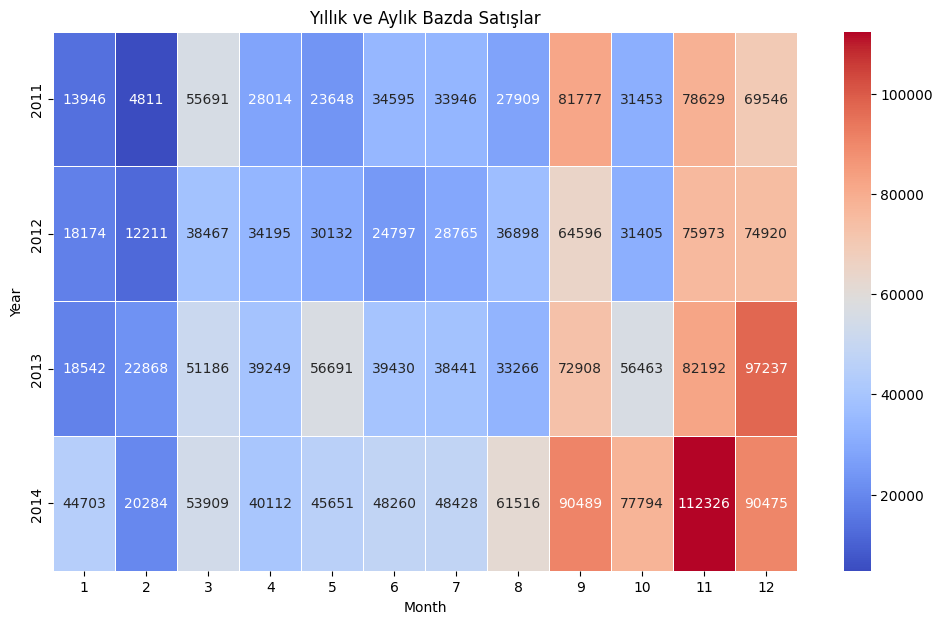

In [ ]:
# Yıl ve Ay bazında toplam satış
year_month_sales = df.groupby(['Year', 'Month'])['Sales'].sum().unstack()

# Görselleştirme: Yıl ve Ay bazında toplam satış
plt.figure(figsize=(12, 7))
sns.heatmap(year_month_sales, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title('Yıllık ve Aylık Bazda Satışlar')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


<ipython-input-10-ab696af38de7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_sales.values, y=customer_sales.index, palette='viridis')


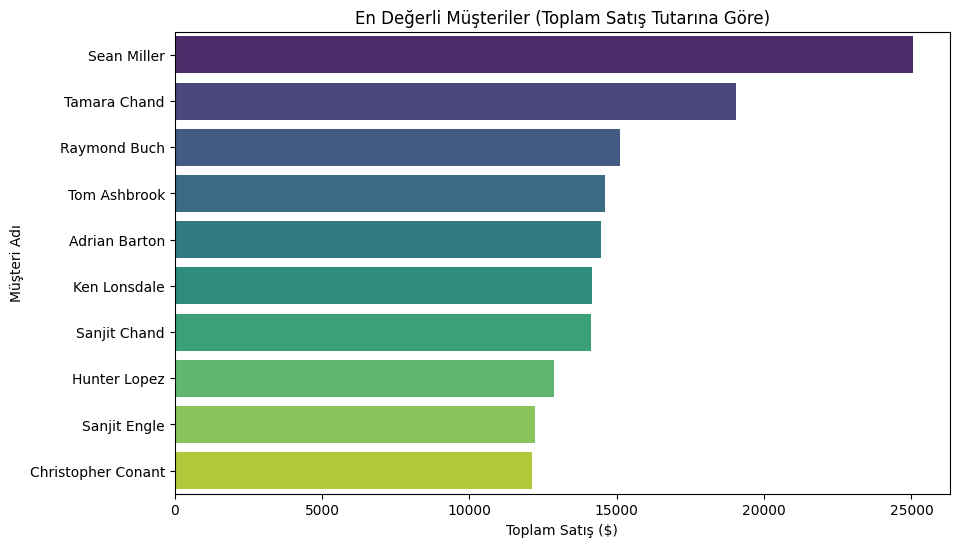

In [ ]:
# Müşteri bazında toplam satışlar
customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_sales.values, y=customer_sales.index, palette='viridis')
plt.title('En Değerli Müşteriler (Toplam Satış Tutarına Göre)')
plt.xlabel('Toplam Satış ($)')
plt.ylabel('Müşteri Adı')
plt.show()


<ipython-input-11-b9a7b13d7811>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_orders.values, y=customer_orders.index, palette='coolwarm')


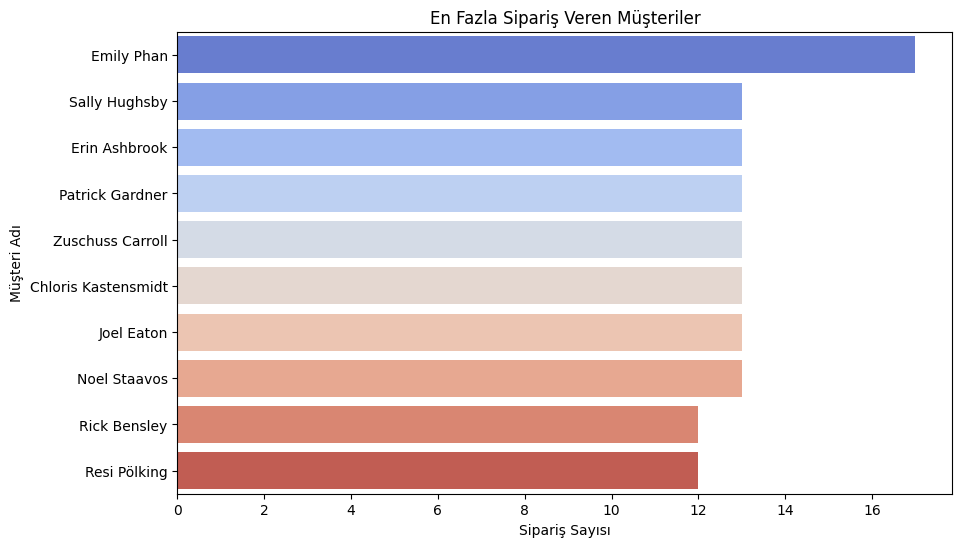

In [ ]:
# Müşteri bazında sipariş sayısı
customer_orders = df.groupby('Customer Name')['Order ID'].nunique().sort_values(ascending=False).head(10)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_orders.values, y=customer_orders.index, palette='coolwarm')
plt.title('En Fazla Sipariş Veren Müşteriler')
plt.xlabel('Sipariş Sayısı')
plt.ylabel('Müşteri Adı')
plt.show()


<ipython-input-12-640edfe3044c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_quantity.values, y=customer_quantity.index, palette='magma')


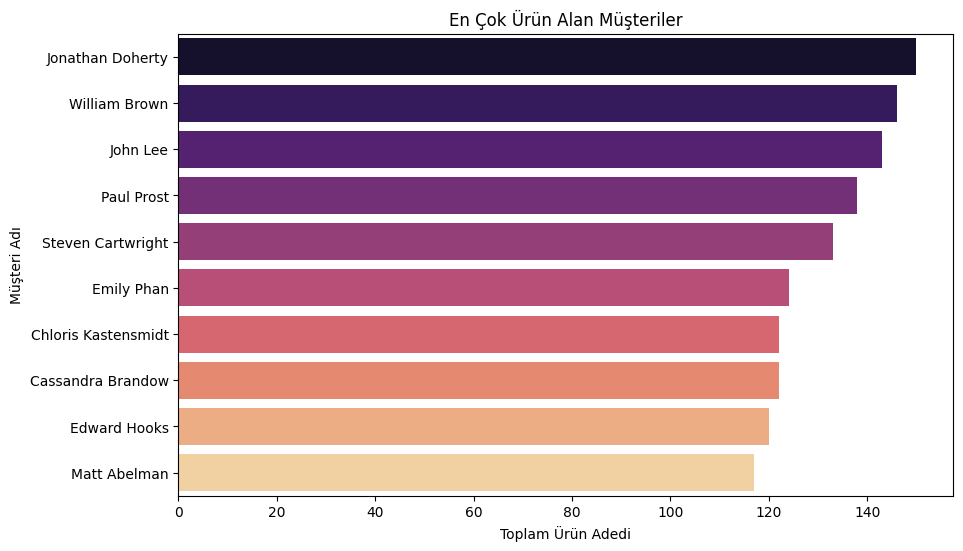

In [ ]:
# Müşteri bazında toplam ürün sayısı
customer_quantity = df.groupby('Customer Name')['Quantity'].sum().sort_values(ascending=False).head(10)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_quantity.values, y=customer_quantity.index, palette='magma')
plt.title('En Çok Ürün Alan Müşteriler')
plt.xlabel('Toplam Ürün Adedi')
plt.ylabel('Müşteri Adı')
plt.show()
